<a href="https://colab.research.google.com/github/zinakhazaee/MachineLearning-SupervisedLearning_Regression/blob/main/usa_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets_sample/usa-real-estate-datase/realtor-data.zip.csv')

In [ ]:
df.shape

(1004966, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004966 entries, 0 to 1004965
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   status          1004966 non-null  object 
 1   bed             864435 non-null   float64
 2   bath            882116 non-null   float64
 3   acre_lot        709920 non-null   float64
 4   city            1004891 non-null  object 
 5   state           1004966 non-null  object 
 6   zip_code        1004761 non-null  float64
 7   house_size      681682 non-null   float64
 8   prev_sold_date  505867 non-null   object 
 9   price           1004895 non-null  float64
dtypes: float64(6), object(4)
memory usage: 76.7+ MB


In [ ]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [ ]:
df.isna().sum()

status                 0
bed               140531
bath              122850
acre_lot          295046
city                  75
state                  0
zip_code             205
house_size        323284
prev_sold_date    499099
price                 71
dtype: int64

In [ ]:
df.columns

Index(['status', 'bed', 'bath', 'acre_lot', 'city', 'state', 'zip_code',
       'house_size', 'prev_sold_date', 'price'],
      dtype='object')

In [ ]:
print('status:','\n', df.status.value_counts(),
      '\n','bed values:','\n', df.bed.value_counts(),
      '\n','bath values:','\n', df.bath.value_counts(),
      '\n','state values:', '\n' ,df.state.value_counts(),
      '\n','city values:', '\n' ,df.city.value_counts())

status: 
 for_sale          1003152
ready_to_build       1814
Name: status, dtype: int64 
 bed values: 
 3.0      267108
2.0      186896
4.0      166232
1.0       95250
5.0       67503
6.0       41023
7.0       14103
8.0       11302
9.0        5910
10.0       2999
12.0       2031
11.0       1493
13.0        378
15.0        335
14.0        330
20.0        261
18.0        244
16.0        188
24.0        165
19.0        125
22.0        110
17.0         96
28.0         54
21.0         40
46.0         36
42.0         30
60.0         27
99.0         23
32.0         21
86.0         21
31.0         20
27.0         13
123.0        12
33.0         11
49.0          8
30.0          8
29.0          7
68.0          6
25.0          4
23.0          3
40.0          3
36.0          3
47.0          3
Name: bed, dtype: int64 
 bath values: 
 2.0      303305
1.0      221660
3.0      209379
4.0       80134
5.0       31834
6.0       15930
7.0        7451
8.0        4889
9.0        2785
10.0       1740
12.0  

In [ ]:
df['house_size'].value_counts()

1200.0     5230
800.0      4852
1000.0     4668
1100.0     4354
750.0      4170
           ... 
11033.0       1
5775.0        1
9821.0        1
10440.0       1
5046.0        1
Name: house_size, Length: 6456, dtype: int64

In [ ]:
df.duplicated().sum()

890758

In [ ]:
df.drop_duplicates(keep='first' ,inplace=True)

In [ ]:
df.shape

(114208, 10)

In [ ]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [ ]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,96697.000000,97924.000000,83424.000000,114175.000000,7.758500e+04,1.141900e+05
mean,3.317538,2.522701,17.697870,8326.533952,2.169625e+03,9.112084e+05
std,1.859059,1.732981,977.382961,4558.849336,5.844772e+03,3.403909e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,0.000000e+00
25%,2.000000,2.000000,0.110000,6041.000000,1.152000e+03,2.500000e+05
50%,3.000000,2.000000,0.260000,8021.000000,1.666000e+03,4.499000e+05
75%,4.000000,3.000000,1.050000,10314.000000,2.500000e+03,8.080000e+05
max,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06,8.750000e+08


<Axes: xlabel='price'>

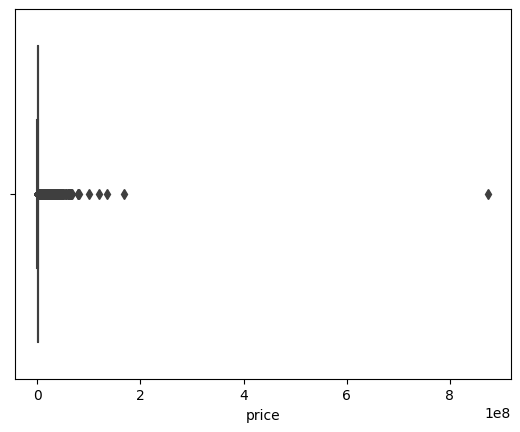

In [ ]:
sns.boxplot(data = df , x='price')

In [ ]:
df.drop(df[df['price'] >= 500000 ].index , axis=0 , inplace= True)

In [ ]:
df.shape

(63424, 10)

<Axes: xlabel='price', ylabel='Count'>

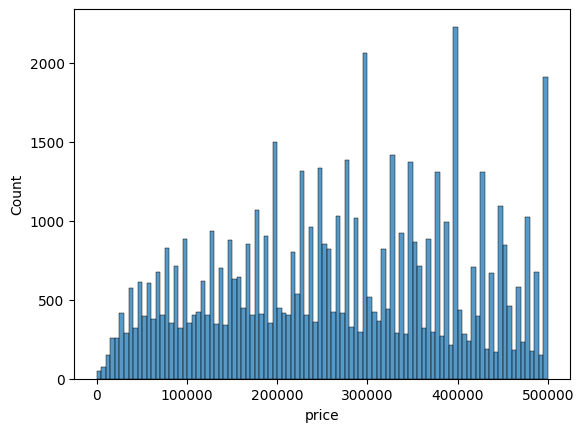

In [ ]:
sns.histplot(df['price'] , bins= 100 )

<Axes: xlabel='house_size'>

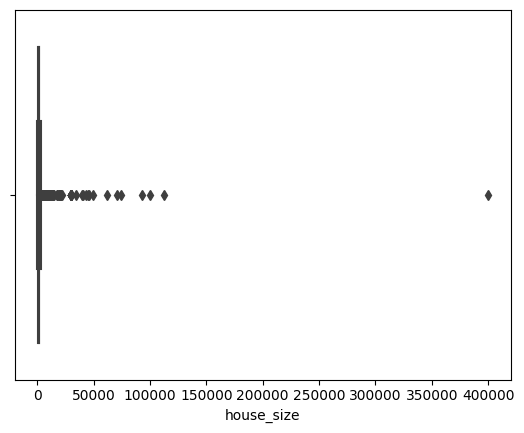

In [ ]:
sns.boxplot(data = df , x='house_size')

<Axes: xlabel='bed'>

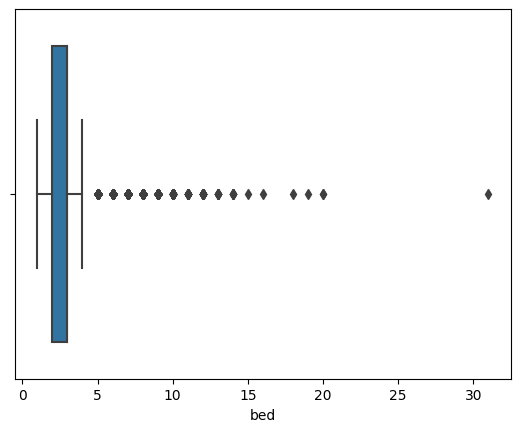

In [ ]:
sns.boxplot(data = df , x='bed')


In [ ]:
df.drop(df[(df['house_size']> 7500 )| (df['bed']>10)].index , axis= 0 , inplace=True)

In [ ]:
df.shape

(63218, 10)

<Axes: xlabel='price'>

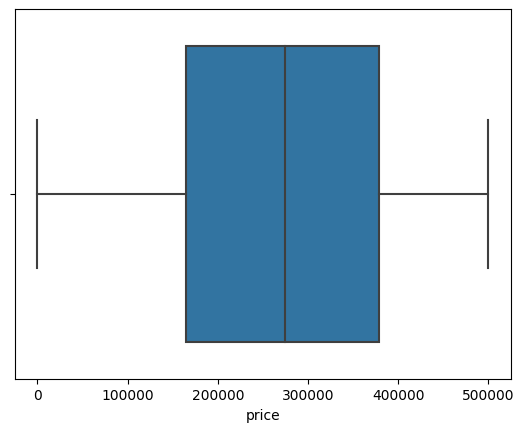

In [ ]:
sns.boxplot(data = df , x='price')

<Axes: xlabel='house_size'>

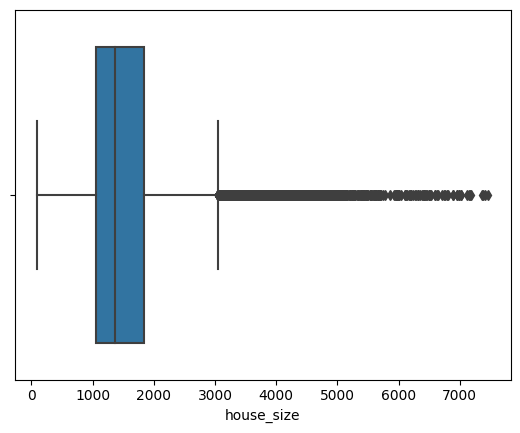

In [ ]:
sns.boxplot(data = df , x='house_size')

In [ ]:
df.drop(columns= ['status','acre_lot', 'zip_code','prev_sold_date'] , inplace=True)

In [ ]:
df.isna().sum()

bed           13544
bath          13003
city             16
state             0
house_size    21603
price            18
dtype: int64

<Axes: xlabel='bed'>

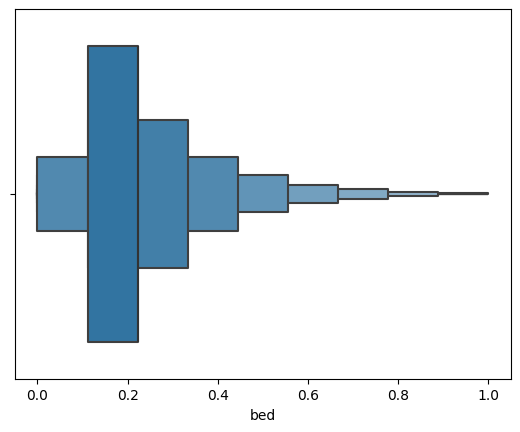

In [52]:
sns.boxenplot(data = df , x= 'bed')

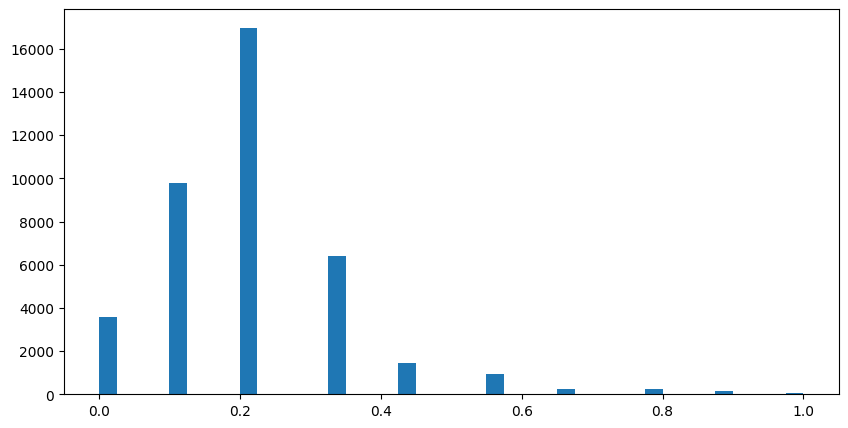

In [51]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= df['bed'], bins=40)
plt.show()

In [ ]:
df['bed'].value_counts()

3.0     20145
2.0     12643
4.0      7829
1.0      5179
5.0      1798
6.0      1194
7.0       346
8.0       294
9.0       178
10.0       68
Name: bed, dtype: int64

<Axes: xlabel='house_size'>

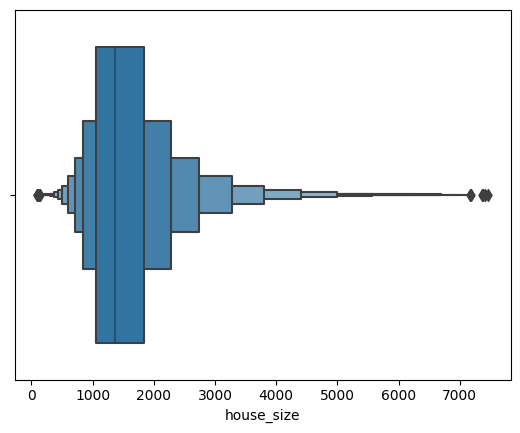

In [ ]:
sns.boxenplot(data = df , x= 'house_size')

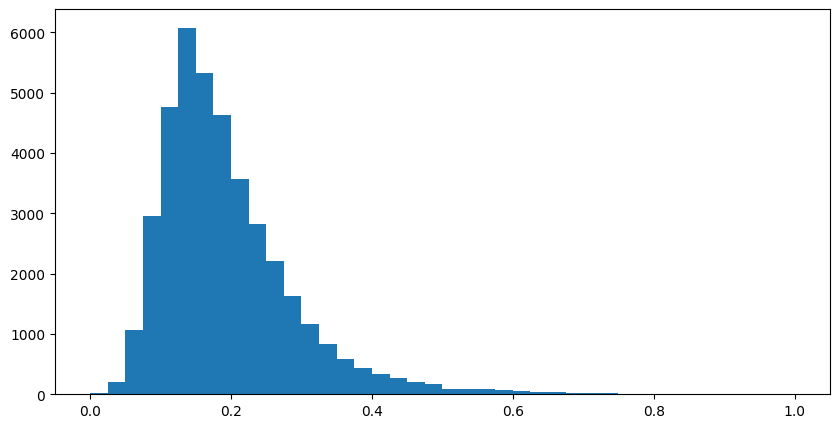

In [50]:
ax = plt.figure(figsize= (10,5))
plt.hist(x= df['house_size'], bins=40)
plt.show()

In [ ]:
df.dropna(subset=['price'] , inplace=True)

In [ ]:
df.dropna(subset=['house_size'] , inplace=True)

In [ ]:
df.dropna(subset=['bed'] , inplace=True)

In [ ]:
df.dropna(subset=['bath'] , inplace=True)

In [ ]:
df.dropna(subset=['city'] , inplace=True)

In [ ]:
df.isna().sum()

bed           0
bath          0
city          0
state         0
house_size    0
price         0
dtype: int64

In [ ]:
df.shape

(39850, 6)

In [ ]:
df.to_csv('/content/drive/MyDrive/datasets_sample/clean_usaHouse.csv')

In [ ]:
df.isna().sum()

bed           0
bath          0
city          0
state         0
house_size    0
price         0
dtype: int64

In [ ]:
df.head()

,bed,bath,city,state,house_size,price
0,3.0,2.0,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,Ponce,Puerto Rico,1800.0,145000.0
5,4.0,3.0,San Sebastian,Puerto Rico,2520.0,179000.0


In [30]:
df = pd.read_csv('/content/drive/MyDrive/datasets_sample/clean_usaHouse.csv')

In [31]:
df.columns

Index(['Unnamed: 0', 'bed', 'bath', 'city', 'state', 'house_size', 'price'], dtype='object')

In [32]:
df.drop('Unnamed: 0' , axis=1 , inplace=True)

In [34]:
df.head()

,bed,bath,city,state,house_size,price
0,3.0,2.0,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,Ponce,Puerto Rico,1800.0,145000.0
4,4.0,3.0,San Sebastian,Puerto Rico,2520.0,179000.0


In [ ]:
x = df.drop('price' , axis=1)
y = df.price

In [ ]:
x.shape

(39850, 6)

In [ ]:
y.shape

(39850,)

In [10]:
from sklearn.preprocessing import  MinMaxScaler, OneHotEncoder, LabelEncoder,StandardScaler

In [35]:
scaler = MinMaxScaler()
df[['bed', 'bath','house_size','price']] = scaler.fit_transform(df[['bed', 'bath','house_size','price']])

In [36]:
df_encoded = pd.get_dummies(df, columns=['state'])

In [38]:
df_encoded.drop('city' , axis=1 , inplace=True)

In [37]:
df_encoded

,bed,bath,city,house_size,price,state_Connecticut,state_Delaware,state_Georgia,state_Maine,state_Massachusetts,state_New Hampshire,state_New Jersey,state_New York,state_Pennsylvania,state_Puerto Rico,state_Rhode Island,state_Vermont,state_Virgin Islands,state_West Virginia
0,0.222222,0.1,Adjuntas,0.111337,0.209210,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.333333,0.1,Adjuntas,0.193754,0.159159,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.111111,0.0,Juana Diaz,0.087984,0.133133,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0.333333,0.1,Ponce,0.230821,0.289290,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.333333,0.2,San Sebastian,0.328581,0.357358,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39845,0.111111,0.1,Bayside,0.162933,0.951954,0,0,0,0,0,0,0,1,0,0,0,0,0,0
39846,0.000000,0.0,Bayside,0.093007,0.869872,0,0,0,0,0,0,0,1,0,0,0,0,0,0
39847,0.000000,0.0,Great Neck,0.088255,0.629631,0,0,0,0,0,0,0,1,0,0,0,0,0,0
39848,0.000000,0.0,Great Neck,0.088255,0.517519,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [39]:
df= df_encoded.copy()

In [40]:
df.shape

(39850, 18)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39850 entries, 0 to 39849
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bed                   39850 non-null  float64
 1   bath                  39850 non-null  float64
 2   house_size            39850 non-null  float64
 3   price                 39850 non-null  float64
 4   state_Connecticut     39850 non-null  uint8  
 5   state_Delaware        39850 non-null  uint8  
 6   state_Georgia         39850 non-null  uint8  
 7   state_Maine           39850 non-null  uint8  
 8   state_Massachusetts   39850 non-null  uint8  
 9   state_New Hampshire   39850 non-null  uint8  
 10  state_New Jersey      39850 non-null  uint8  
 11  state_New York        39850 non-null  uint8  
 12  state_Pennsylvania    39850 non-null  uint8  
 13  state_Puerto Rico     39850 non-null  uint8  
 14  state_Rhode Island    39850 non-null  uint8  
 15  state_Vermont      

In [42]:
X = df.drop('price', axis=1)  # features
y = df['price']

In [ ]:
#lable = LabelEncoder()

In [ ]:
#scale = MinMaxScaler()

In [ ]:
#onehot = OneHotEncoder()

In [ ]:
#X1 = scale.fit_transform(df[[ 'bed', 'bath','house_size']])

In [ ]:
#X2 = lable.fit_transform(df['state'])

In [ ]:
#X2 = onehot.fit_transform(X2.reshape(-1,1))

In [ ]:
#X = pd.concat([pd.DataFrame(X1) ,  pd.DataFrame(X2)] , axis= 1)

In [21]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [23]:
from sklearn.linear_model import LinearRegression

In [44]:
reg = LinearRegression()

In [45]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [46]:
reg.score(xtest,ytest)

0.28379275317546293

In [47]:
reg.coef_

array([-0.21222912,  0.85544725,  0.60515261, -0.02422197, -0.06288379,
        0.21039479, -0.06122326,  0.11757678,  0.02932486,  0.0078904 ,
        0.0726652 , -0.0355287 , -0.24628425,  0.0718243 , -0.06577355,
       -0.01376082,  0.        ])

In [48]:
reg.intercept_

0.42840245169617125

##Using PiPe line

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [ ]:
df.head()

,Unnamed: 0,bed,bath,city,state,house_size,price
0,0,3.0,2.0,Adjuntas,Puerto Rico,920.0,105000.0
1,1,4.0,2.0,Adjuntas,Puerto Rico,1527.0,80000.0
2,2,2.0,1.0,Juana Diaz,Puerto Rico,748.0,67000.0
3,3,4.0,2.0,Ponce,Puerto Rico,1800.0,145000.0
4,5,4.0,3.0,San Sebastian,Puerto Rico,2520.0,179000.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bed'].plot(kind='hist', bins=20, title='bed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['bath'].plot(kind='hist', bins=20, title='bath')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('city').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Unnamed: 0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Unnamed: 0', y='bed', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='bed', y='bath', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='bath', y='house_size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['bed']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('bed')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['bath']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('bath')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['house_size']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('house_size')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('city')):
  _plot_series(series, series_name, i)
  fig.legend(title='city', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['bed'].plot(kind='line', figsize=(8, 4), title='bed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['bath'].plot(kind='line', figsize=(8, 4), title='bath')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Unnamed: 0', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='bed', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['city'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='bath', y='city', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
X = df.drop(columns=['price'] , axis= 1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

In [ ]:
col_trans = make_column_transformer((OneHotEncoder(sparse=False),['state']), remainder='passthrough')

In [ ]:
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 ['state'])])

In [ ]:
scale = StandardScaler()

In [ ]:
lr = LinearRegression()

In [ ]:
pipeline = make_pipeline(col_trans , scale , lr)

In [ ]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['state'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: ignored

In [ ]:
y_pred_lr = pipeline.predict(X_test)
y_pred_lr

array([209739.58632599, 290076.02325857, 274344.61439692, ...,
       286046.87276776, 327214.2258319 , 234695.32524894])

In [ ]:
r2_score(y_test, y_pred_lr)

0.28514510101399493

## Using Pipeline 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.compose import  ColumnTransformer , make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [ ]:
df.shape

(39850, 7)

In [ ]:
df.isnull().sum()

Unnamed: 0    0
bed           0
bath          0
city          0
state         0
house_size    0
price         0
dtype: int64

In [ ]:
print("DataFrame columns:", df.columns.tolist())

DataFrame columns: ['Unnamed: 0', 'bed', 'bath', 'city', 'state', 'house_size', 'price']


In [ ]:
y = df['price']

In [ ]:
X = df.drop(columns=['price'] , axis=1)

In [ ]:
numerical_features = df[['bed', 'bath', 'house_size']]

In [ ]:
categorical_features = df[['city', 'state']]

In [ ]:
numeric_transformer = StandardScaler()

In [ ]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
#using make_column_transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numerical_features),
    (categorical_transformer, categorical_features)
)

In [ ]:
#usig ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                         bed  bath  house_size
0      3.0   2.0       920.0
1      4.0   2.0      1527.0
2      2.0   1.0       748.0
3      4.0   2.0      1800.0
4      4.0   3.0      2520.0
...    ...   ...         ...
39845  2.0   2.0      1300.0
39846  1.0   1.0       785.0
39847  1.0   1.0       750.0
39848  1.0   1.0       750.0
39849  1.0   1.0       900.0

[39850 rows x 3 columns]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                                  city        state
0           Adjuntas  Puerto Rico
1           Adjuntas  Puerto Rico
2         Juana Diaz  Puerto Rico
3              Ponce  Puerto Rico
4      San Sebastian  Puerto Rico
...              ...          ...
39845        Bayside     New York
39846        Bayside     New York
39847     Great Neck     New York
39848     Great Neck     New York
39849     Great Neck     New York

[39850 rows x 2 columns])])),
                ('regressor', LinearRegression())])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model.fit(X_train, y_train)

ValueError: ignored